In [1]:
import matplotlib.pyplot as plt
import sacc
import numpy as np

In [2]:
c = ['teal', 'powderblue', 'orange',  'cornflowerblue', 'tomato']
z_labels = ['$0.30 < z < 0.55$','$0.55 < z < 0.80$','$0.80 < z < 1.05$','$1.05 < z < 2.0$']

In [3]:
def plot_cl_ee(s, theory=None):
    
    plt.clf()
    fig, ax = plt.subplots(2, 2, figsize=(6, 6), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    for dt in s.get_data_types():
        print(dt)
        if dt == 'galaxy_shear_cl_ee':
            for i in range(4):

                ell, cl, cov = s.get_ell_cl(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)

                if i<2: j = 0 
                else: j = 1
                    
                if theory is not None:
                    ell_th, cl_th, cov_th = theory.get_ell_cl(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)

                    ax[j][i%2].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[i], label = 'Theory')
              
                ax[j][i%2].errorbar(ell, cl, np.sqrt(np.diag(cov)), fmt = '.', capsize=1.5, elinewidth=0.8, color = c[i], label = 'Measurements')
                ax[j][i%2].text(0.65, 0.88, z_labels[i], horizontalalignment='center',
                              verticalalignment='center', transform=ax[j][i%2].transAxes)#, fontsize=12)
                ax[j][i%2].set_xscale('log')
                ax[j][i%2].set_yscale('log')
                ax[j][i%2].set_ylim(10**(-11), 2*10**(-8))
                
                if i>1: 
                    ax[j][i%2].set_xlabel(r'$l$ ')
                if i%2<1:
                    ax[j][i%2].set_ylabel(r'$C_{EE} (l)$')

    ax[1][0].legend(frameon = False, loc = 'lower left')

    return fig

In [12]:
def plot_cl_ee_ratios(s, theory=None):
    
    plt.clf()
    fig, ax = plt.subplots(2, 2, figsize=(6, 6), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    for dt in s.get_data_types():
        print(dt)
        if dt == 'galaxy_shear_cl_ee':
            for i in range(4):

                ell, cl, cov = s.get_ell_cl(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)
                print(len(ell))
                ell_th, cl_th, cov_th = theory.get_ell_cl(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)
                if i<2: j = 0 
                else: j = 1
                ax[j][i%2].errorbar(ell, cl/cl_th, np.sqrt(np.diag(cov))/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[i], label = 'Measurements')
                #ax[j][i%2].plot(ell, cl/cl_th, ls = '-', lw = '1.5', color = c[i], label ='Data/Theory')
                ax[j][i%2].text(0.5, 0.88, z_labels[i], horizontalalignment='center',
                              verticalalignment='center', transform=ax[j][i%2].transAxes)#, fontsize=12)
                ax[j][i%2].set_xscale('log')
                ax[j][i%2].axhline(y=1., color = 'k', ls = ':')
                
                if i>1: 
                    ax[j][i%2].set_xlabel(r'$l$ ')
                if i%2<1:
                    ax[j][i%2].set_ylabel(r'$C_{EE} (l)$')

    ax[1][0].legend(frameon = False, loc = 'lower left')

    return fig

## With Shape Noise last run

In [5]:
file = '/Users/juditprat/Downloads/summary_statistics_fourier_with_shape_noise.sacc' 
f = sacc.Sacc.load_fits(file)
file = '/Users/juditprat/Downloads/twopoint_theory_fourier.sacc'
t = sacc.Sacc.load_fits(file)

for dt in f.get_data_types():
        print(dt)
print ('----')
for dt in t.get_data_types():
        print(dt)

galaxy_density_cl
galaxy_shearDensity_cl_e
galaxy_shear_cl_ee
----
galaxy_density_cl
galaxy_shearDensity_cl_e
galaxy_shear_cl_ee


galaxy_density_cl
galaxy_shearDensity_cl_e
galaxy_shear_cl_ee


<Figure size 432x288 with 0 Axes>

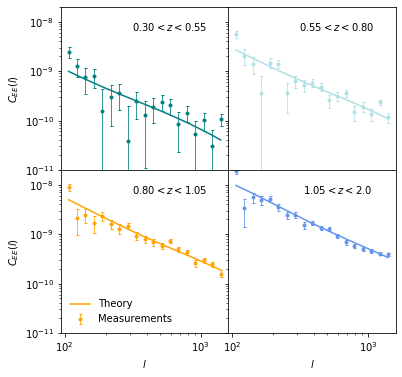

In [6]:
fig = plot_cl_ee(f, theory=t)

galaxy_density_cl
galaxy_shearDensity_cl_e
galaxy_shear_cl_ee
19
19
19
19


<Figure size 432x288 with 0 Axes>

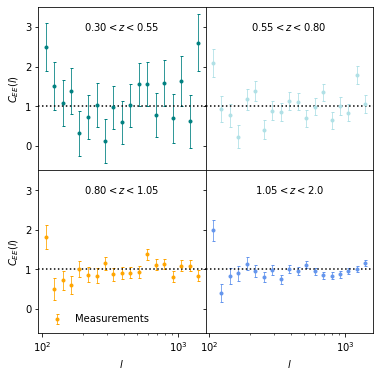

In [13]:
fig = plot_cl_ee_ratios(f, theory=t)

In [7]:
dp = f.get_data_points()

## No shape noise run

In [8]:
file_no_sn = '/Users/juditprat/Downloads/summary_statistics_fourier_no_shape_noise.sacc' 
f_no_sn = sacc.Sacc.load_fits(file_no_sn)
file_no_sn = '/Users/juditprat/Downloads/twopoint_theory_fourier_no_shape_noise.sacc'
t_no_sn = sacc.Sacc.load_fits(file_no_sn)

galaxy_density_cl
galaxy_shearDensity_cl_e
galaxy_shear_cl_ee


<Figure size 432x288 with 0 Axes>

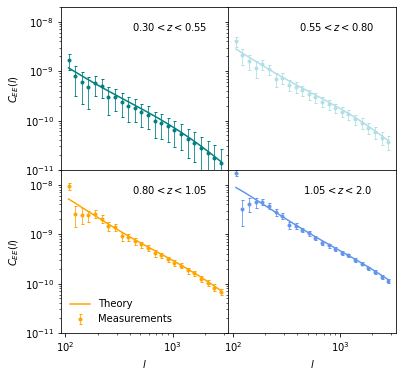

In [14]:
fig = plot_cl_ee(f_no_sn, theory=t_no_sn)

galaxy_density_cl
galaxy_shearDensity_cl_e
galaxy_shear_cl_ee
24
24
24
24


<Figure size 432x288 with 0 Axes>

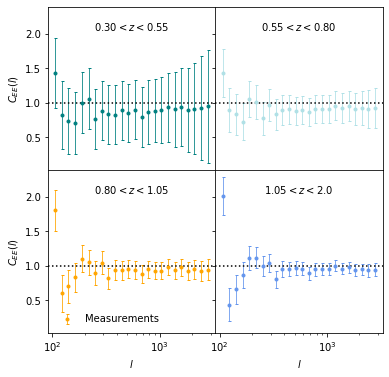

In [15]:
fig = plot_cl_ee_ratios(f_no_sn, theory=t_no_sn)